In [2]:
#Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
#importing the dataset
df=pd.read_csv("uber.csv")

In [5]:
#1 preprocess the dataset
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [6]:
df.info()  #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.columns  #TO get number of columns in the dataset 

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df=df.drop(['Unnamed: 0','key'], axis= 1)

In [9]:
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [10]:
df.shape  #To get the total (Rows,Columns)

(200000, 7)

In [11]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
#Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

In [13]:
df.dtypes


fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [14]:
#Filling the Missing Values
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [15]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace=True)

C:\Users\Manasi\AppData\Local\Temp\ipykernel_12668\2429018586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)
C:\Users\Manasi\AppData\Local\Temp\ipykernel_12668\2429018586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [16]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
 # To segregate each time of date and time
df= df.assign(hour = df.pickup_datetime.dt.hour, 
             day= df.pickup_datetime.dt.day, 
             month = df.pickup_datetime.dt.month, 
             year = df.pickup_datetime.dt.year, 
             dayofweek = df.pickup_datetime.dt.dayofweek) 

In [18]:
df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  
0  2015          3  
1  2009          4  
2  2009          0  
3  2009          4  
4  2014          3

In [19]:
# Here we are going to use Heversine formula to calculate the distance between two points and journey, using the longitude and latitude values
from math import * 
# function to calculate the travel distance from the longitudes and latitudes 
def distance_transform(longitude1, latitude1, longitude2, latitude2): 
    travel_dist = [] 
     
    for pos in range(len(longitude1)): 
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]]) 
        dist_long = long2 - long1 
        dist_lati = lati2 - lati1 
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2 
        c = 2 * asin(sqrt(a))*6371 
        travel_dist.append(c) 
        
    return travel_dist 

df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(), 
                                                df['dropoff_longitude'].to_numpy(), 
                                                df['dropoff_latitude'].to_numpy() 
                                              )
df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  dist_travel_km  
0  2015          3        1.683323  
1  2009          4        2.457590  
2  2009          0        5.036377  
3  2009          4        1.661683  
4  2014          3        4.475450

In [20]:
df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  dist_travel_km  
0  2015          3        1.683323  
1  2009          4        2.457590  
2  2009          0        5.036377  
3  2009          4        1.661683  
4  2014          3        4.475450

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

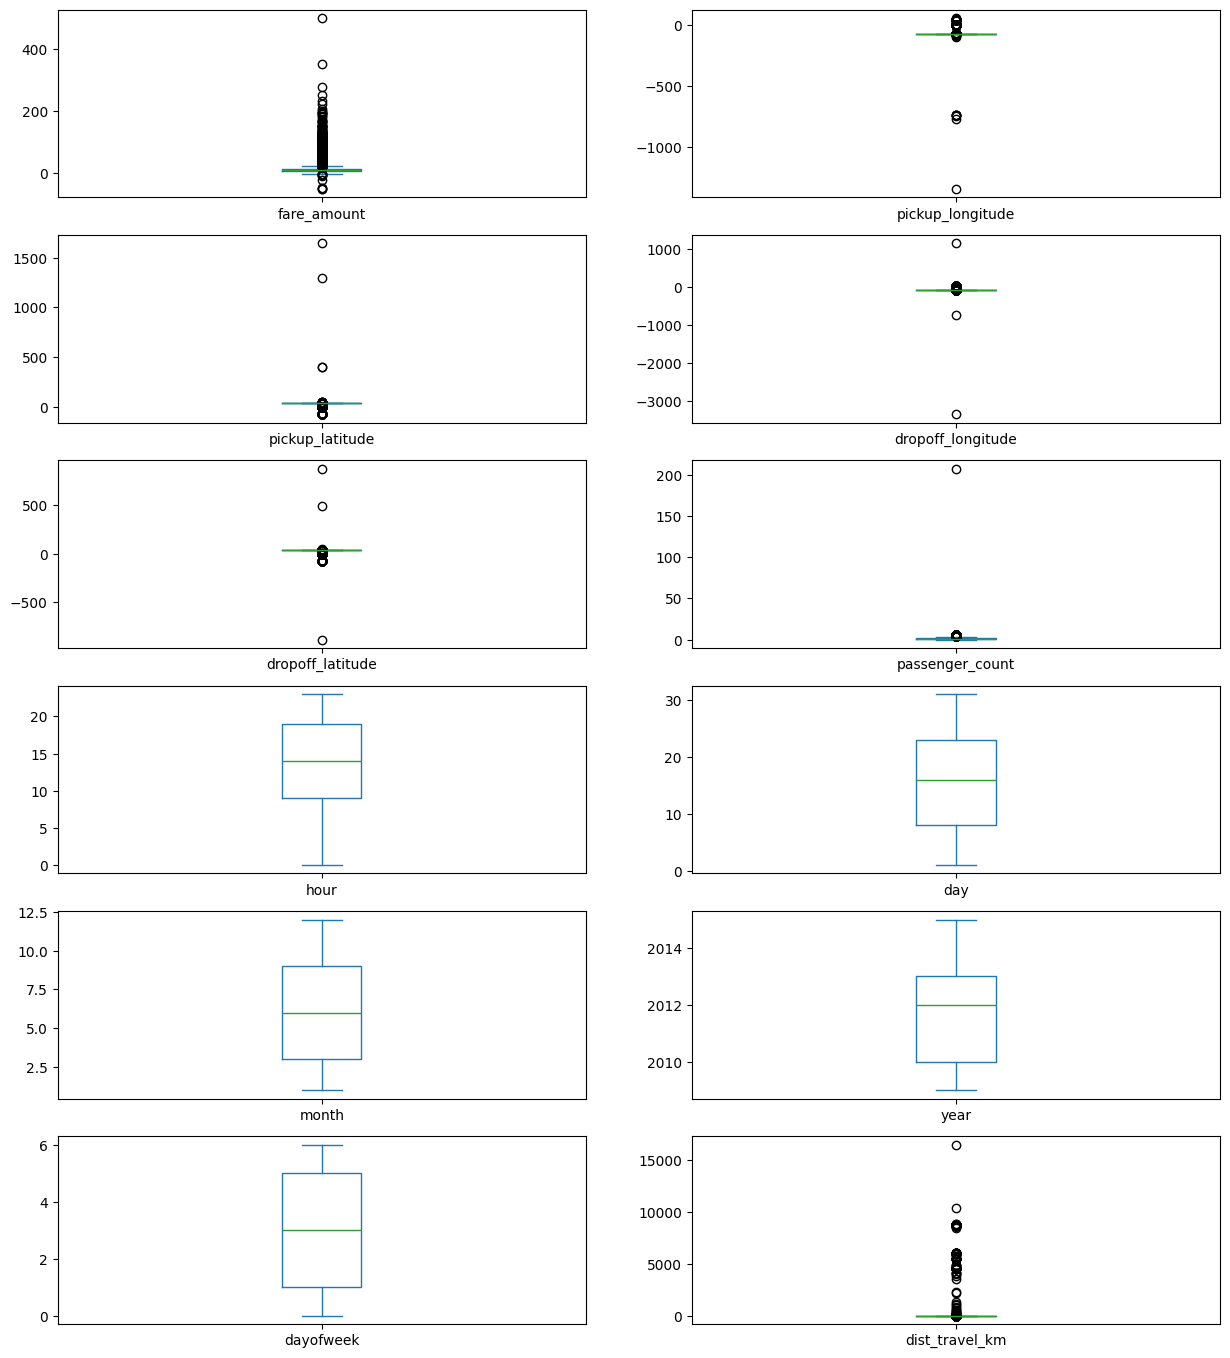

In [21]:
# Checking outliers and filling them
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [22]:
#  #Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col): 
    Q1 = df1[col].quantile(0.25) 
    Q3 = df1[col].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_whisker = Q1-1.5*IQR 
    upper_whisker = Q3+1.5*IQR 
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker) 
    return df1 
 
def treat_outliers_all(df1 , col_list): 
    for c in col_list: 
        df1 = remove_outlier(df , c) 
    return df1

In [23]:
 df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

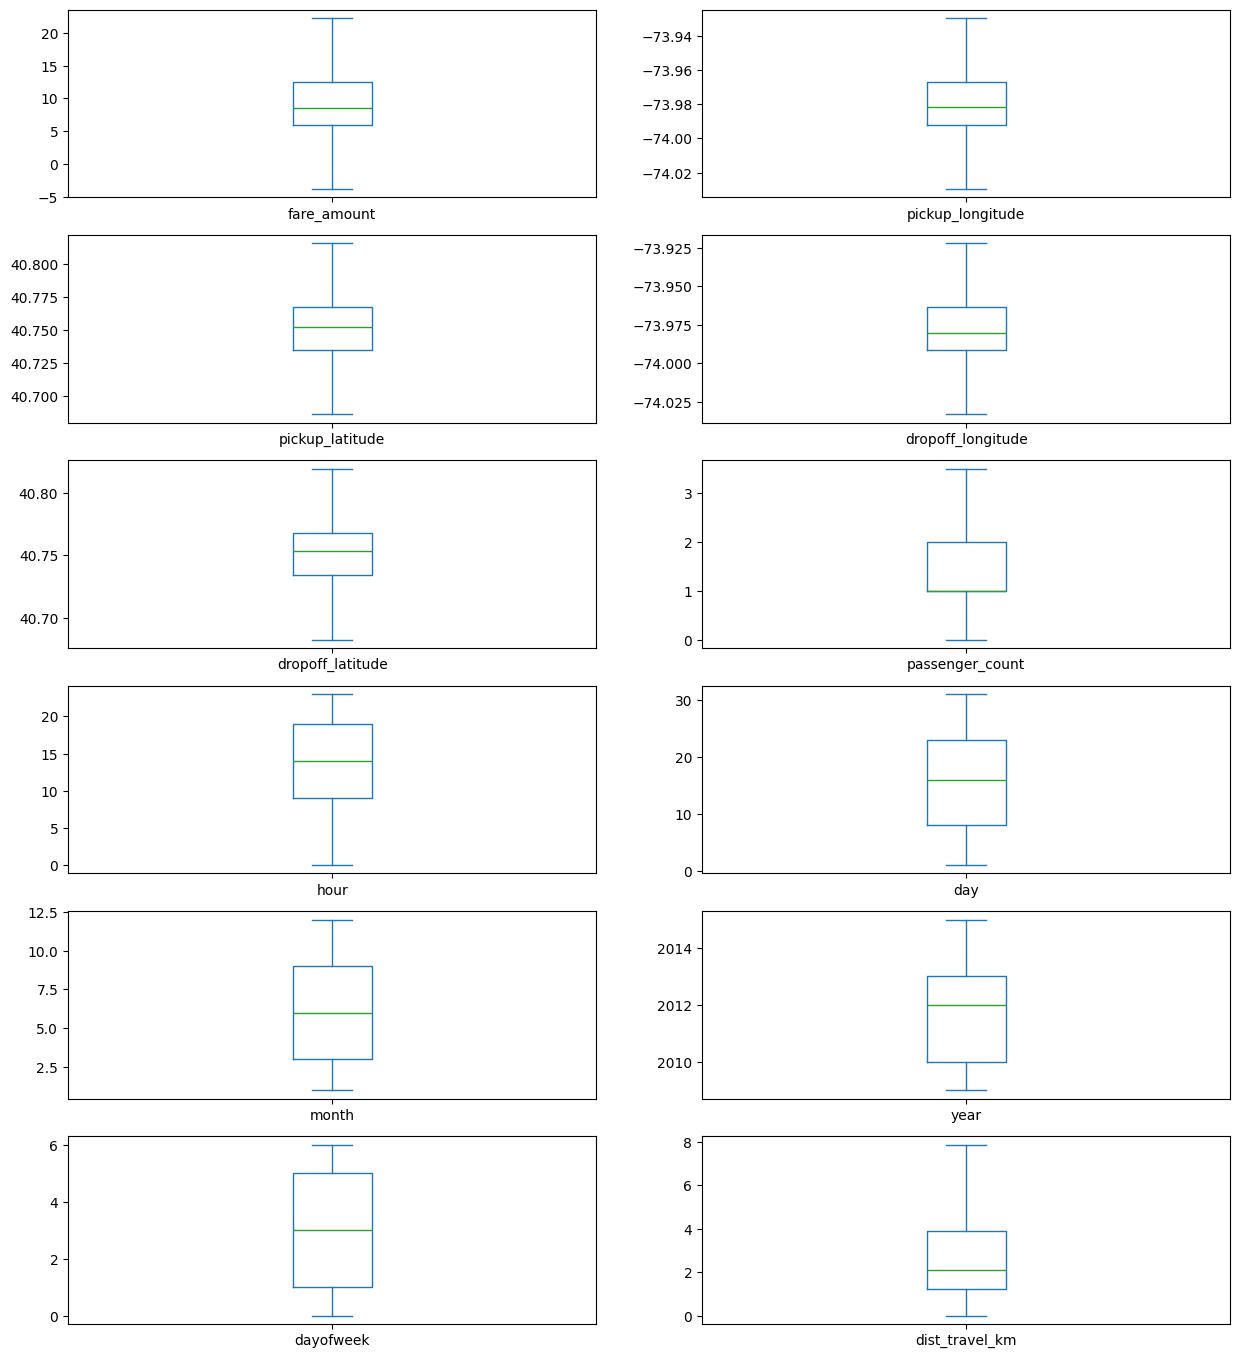

In [24]:
 df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [25]:
#Uber doesn't travel over 130 kms so minimize the distance  
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)] 
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 13)


In [26]:
 #Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180) 
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) | 
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) | 
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) | 
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90) 
                                    ]

In [27]:
 df.drop(incorrect_coordinates, inplace = True, errors = 'ignore') 

In [28]:
 df.head() 

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.929786        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217              1.0    19    7      5   
1         -73.994710         40.750325              1.0    20   17      7   
2         -73.962565         40.772647              1.0    21   24      8   
3         -73.965316         40.803349              3.0     8   26      6   
4         -73.973082         40.761247              3.5    17   28      8   

   year  dayofweek  dist_travel_km  
0  2015          3        1.683323  
1  2009          4        2.457590  
2  2009          0        5.036377  
3  2009          4        1.661683  
4  2014          3        4.475450

In [29]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<Axes: >

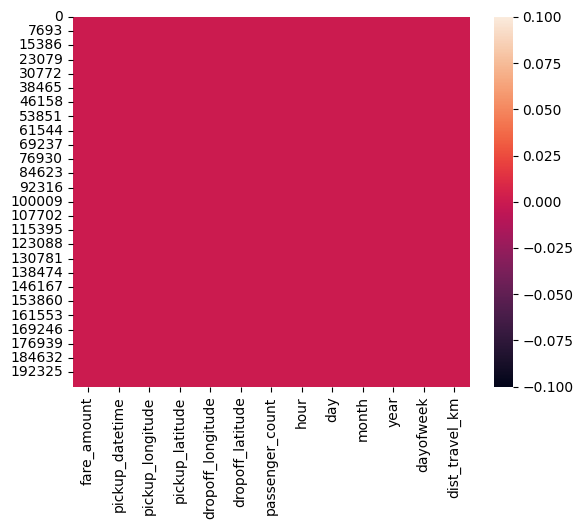

In [30]:
sn.heatmap(df.isnull()) #Free for null values 

In [31]:
corr = df.corr() #Function to find the correlation 

In [32]:
corr

fare_amount  pickup_datetime  pickup_longitude  \
fare_amount           1.000000         0.146982          0.154069   
pickup_datetime       0.146982         1.000000          0.010404   
pickup_longitude      0.154069         0.010404          1.000000   
pickup_latitude      -0.110842        -0.014087          0.259497   
dropoff_longitude     0.218675         0.011714          0.425619   
dropoff_latitude     -0.125898        -0.009879          0.073290   
passenger_count       0.015778        -0.008159         -0.013213   
hour                 -0.023623         0.002024          0.011579   
day                   0.004534        -0.002073         -0.003204   
month                 0.030817         0.038523          0.001169   
year                  0.141277         0.987982          0.010198   
dayofweek             0.013652         0.004834         -0.024652   
dist_travel_km        0.844374         0.026246          0.098094   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
fare_amount              -0.110842           0.218675         -0.125898   
pickup_datetime          -0.014087           0.011714         -0.009879   
pickup_longitude          0.259497           0.425619          0.073290   
pickup_latitude           1.000000           0.048889          0.515714   
dropoff_longitude         0.048889           1.000000          0.245667   
dropoff_latitude          0.515714           0.245667          1.000000   
passenger_count          -0.012889          -0.009303         -0.006308   
hour                      0.029681          -0.046558          0.019783   
day                      -0.001553          -0.004007         -0.003479   
month                     0.001562           0.002391         -0.001193   
year                     -0.014243           0.011346         -0.009603   
dayofweek                -0.042310          -0.003336         -0.031919   
dist_travel_km           -0.046812           0.186531         -0.038900   

                   passenger_count      hour       day     month      year  \
fare_amount               0.015778 -0.023623  0.004534  0.030817  0.141277   
pickup_datetime          -0.008159  0.002024 -0.002073  0.038523  0.987982   
pickup_longitude         -0.013213  0.011579 -0.003204  0.001169  0.010198   
pickup_latitude          -0.012889  0.029681 -0.001553  0.001562 -0.014243   
dropoff_longitude        -0.009303 -0.046558 -0.004007  0.002391  0.011346   
dropoff_latitude         -0.006308  0.019783 -0.003479 -0.001193 -0.009603   
passenger_count           1.000000  0.020274  0.002712  0.010351 -0.009749   
hour                      0.020274  1.000000  0.004677 -0.003926  0.002156   
day                       0.002712  0.004677  1.000000 -0.017360 -0.012170   
month                     0.010351 -0.003926 -0.017360  1.000000 -0.115859   
year                     -0.009749  0.002156 -0.012170 -0.115859  1.000000   
dayofweek                 0.048550 -0.086947  0.005617 -0.008786  0.006113   
dist_travel_km            0.009709 -0.038366  0.003062  0.011628  0.024278   

                   dayofweek  dist_travel_km  
fare_amount         0.013652        0.844374  
pickup_datetime     0.004834        0.026246  
pickup_longitude   -0.024652        0.098094  
pickup_latitude    -0.042310       -0.046812  
dropoff_longitude  -0.003336        0.186531  
dropoff_latitude   -0.031919       -0.038900  
passenger_count     0.048550        0.009709  
hour               -0.086947       -0.038366  
day                 0.005617        0.003062  
month              -0.008786        0.011628  
year                0.006113        0.024278  
dayofweek           1.000000        0.027053  
dist_travel_km      0.027053        1.000000

<Axes: >

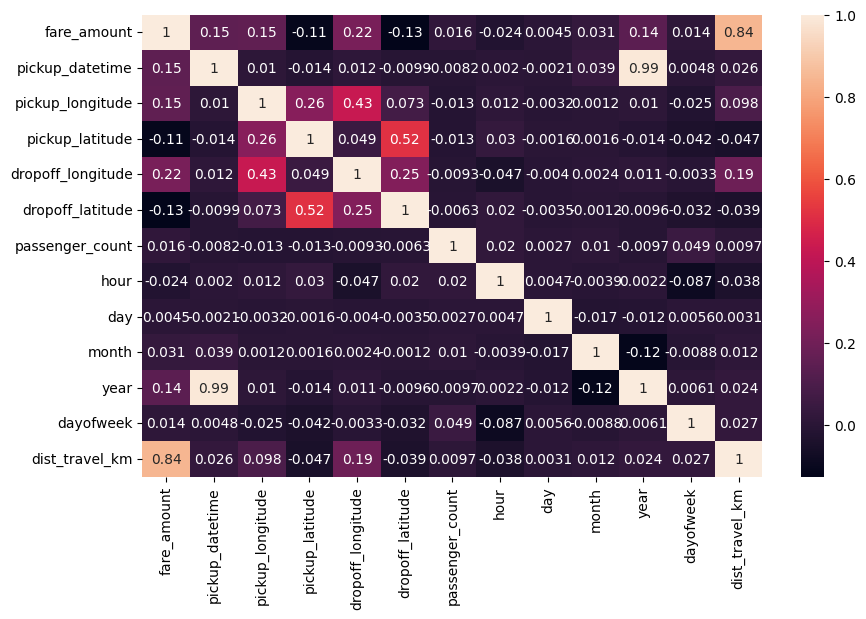

In [33]:
 fig,axis = plt.subplots(figsize = (10,6)) 
sn.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated) 

In [34]:
# Dividing the dataset into feature and target values
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']] 

In [35]:
y = df['fare_amount'] 

In [36]:
# Dividing the dataset into training and testing dataset
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33) 

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()

In [38]:
regression.fit(X_train,y_train) 

LinearRegression()

In [39]:
regression.intercept_ #To find the linear intercept 

2713.9309445238423

In [40]:
regression.coef_ #To find the linear coeeficient 

array([ 1.68687091e+01, -9.22849564e+00,  1.49532557e+01, -1.72807399e+01,
        5.38869366e-02,  1.00328586e-02,  2.29583152e-03,  5.52038798e-02,
        3.60027266e-01, -3.04267078e-02,  2.00490727e+00])

In [41]:
prediction = regression.predict(X_test) #To predict the target values 

In [42]:
print(prediction)

[12.57626848  5.54460089  6.44551228 ... 20.49233342 19.5632771
  6.3688998 ]


In [43]:
y_test 

187702    11.30
62017      5.50
67269      9.70
134655     6.00
96261     22.25
          ...  
180273     6.10
124697     2.50
22025     22.25
96583     22.25
116864     6.50
Name: fare_amount, Length: 66000, dtype: float64

In [44]:
# Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error
from sklearn.metrics import r2_score  
r2_score(y_test,prediction)

0.7473524852713724

In [45]:
 from sklearn.metrics import mean_squared_error
 MSE = mean_squared_error(y_test,prediction) 
MSE

7.4745671795916655

In [46]:
RMSE = np.sqrt(MSE)
RMSE

2.733965467885735

In [48]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [50]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
y_pred = rf.predict(X_test) 

In [52]:
y_pred

array([12.338,  5.051,  7.271, ..., 22.105, 17.272,  5.575])

In [53]:
# Metrics evaluatin for Random Forest
R2_Random = r2_score(y_test,y_pred) 
R2_Random

0.8061812612748434

In [54]:
 MSE_Random = mean_squared_error(y_test,y_pred) 
MSE_Random 

5.734120063761524

In [55]:
RMSE_Random = np.sqrt(MSE_Random) 
RMSE_Random

2.394602276738566